# To calculate the phase diagram of CFO

### 1. This code will use the formation energies of the competing phases of CFO and plot a phase diagram. 
### 2. The intersection points are calculated and used to get median point in the stability domain.
### 3. Three phase diagrams are made using: 1. Experimetal, 2. FERE, 3. PBEsol+U formation energies.



CoO -4.6895 -2.474 -0.9784999999999995 0 0.6666666666666666
Co3O4 -4.3821666666666665 -3.0886666666666667 -1.2934999999999999 0 1.0
FeO -2.829 -6.194999999999999 0 -0.536999999999999 2.0
Fe2O3 -4.286 -3.2810000000000006 0 -0.4236666666666675 0.6666666666666666
Fe3O4 -3.8770000000000002 -4.098999999999999 0 -0.22199999999999953 0.9999999999999999


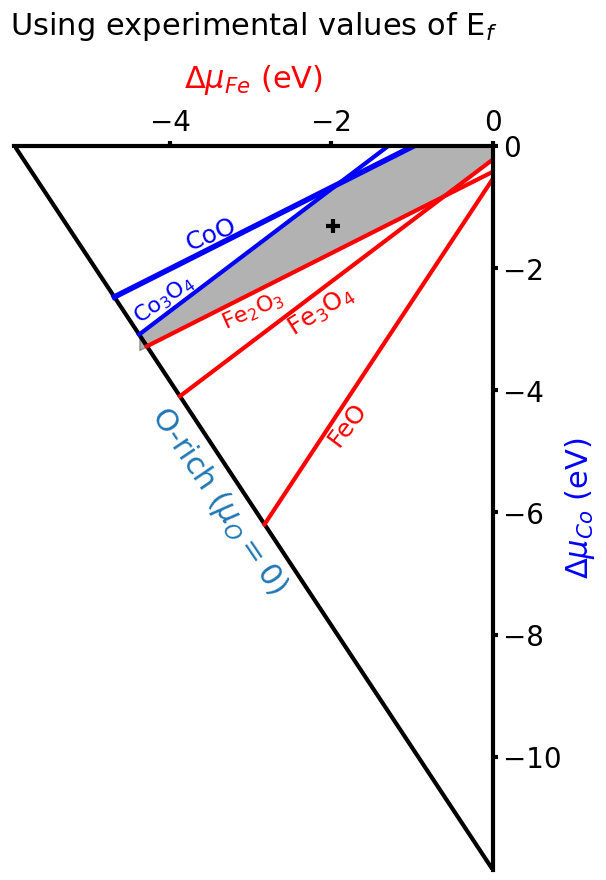

In [1]:
### EXP
import matplotlib.pyplot as plt
import numpy as np
import math as m
from scipy.integrate import quad

####
fig=plt.figure(figsize=(6.6, 10.2))
ax=fig.add_subplot(111, label="1")
ax.xaxis.tick_top()
ax.yaxis.tick_right()
plt.subplots_adjust(top=0.82) 
plt.subplots_adjust(right=0.85) 
ax.tick_params(axis = 'both', which = 'major', labelsize = 20, width=3)
ax.spines['top'].set_linewidth(3)
ax.spines['right'].set_linewidth(3)

CoO=-2.474
Co3O4=-9.266
FeO=-2.829
Fe2O3=-8.572
Fe3O4=-11.631
CoFe2O4=-11.853

Co_lim=CoFe2O4
Fe_lim=CoFe2O4/2
#print(Co_lim,Fe_lim)
mu_Co=np.arange(0.0,Co_lim,-0.01)
mu_Fe=np.arange(0.0,Fe_lim,-0.01)
plt.ylim(Co_lim,0)
plt.xlim(Fe_lim,0)

ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.xaxis.set_label_position('top') 
ax.yaxis.set_label_position('right') 
ax.set_ylabel("$\Delta\mu_{Co}$ (eV)", size=22, color="blue",rotation='vertical',labelpad=1)
ax.set_xlabel("$\Delta\mu_{Fe}$ (eV)", size=22, labelpad=15, color="red")
#ax.set_title("Phase diagram of CoFe$_2$O$_4$ (Exp.)", pad=10, size=18)
ax.set_title("Using experimental values of E$_f$", pad=20, size=22)
# equation: y=(-y0/x0)*(x-x0)
slope=-Co_lim/Fe_lim
theta=m.degrees(m.atan(slope))
mu_Co=slope*(mu_Fe - Fe_lim)

#print(slope,theta)
###################### mu_O 
ax.plot(mu_Fe,mu_Co,color='black',linewidth=3)
plt.text((Fe_lim-2.75)/2, (Co_lim-2.75)/2,'O-rich ($\mu_O = 0$)', size=22, color='C0',rotation=-56)
#print(mu_Co)
x0_muO=Fe_lim
y0_muO=0
x1_muO=0
y1_muO=Co_lim

###################### CoO: 
y0_CoO=CoO
x0_CoO=(y0_CoO - Co_lim)/slope
x1_CoO=-((4*CoO) - CoFe2O4)/2
y1_CoO=0
slope_CoO=(y1_CoO-y0_CoO)/(x1_CoO-x0_CoO)
print("CoO",  x0_CoO,y0_CoO,x1_CoO,y1_CoO,slope_CoO)
point1=[x0_CoO,x1_CoO]
point2=[y0_CoO,y1_CoO]
ax.plot(point1,point2, color="blue",linewidth=4)
plot_CoO=slope_CoO*(mu_Fe - x1_CoO)

###################### Co3O4: 
y0_Co3O4 =Co3O4/3
x0_Co3O4 =(y0_Co3O4 - Co_lim)/slope
x1_Co3O4 =-(Co3O4 - CoFe2O4)/2
y1_Co3O4 =0
slope_Co3O4 =(y1_Co3O4-y0_Co3O4)/(x1_Co3O4-x0_Co3O4)
print("Co3O4",  x0_Co3O4,y0_Co3O4,x1_Co3O4,y1_Co3O4,slope_Co3O4)
point1 =[x0_Co3O4,x1_Co3O4]
point2 =[y0_Co3O4,y1_Co3O4]
ax.plot(point1,point2, color="blue",linewidth=3)
plot_Co3O4 =slope_Co3O4*(mu_Fe - x1_Co3O4)

###################### FeO: 
x0_FeO=FeO
y0_FeO=slope*x0_FeO + Co_lim
y1_FeO=-(4*FeO - CoFe2O4)
x1_FeO=0
slope_FeO=(y1_FeO-y0_FeO)/(x1_FeO-x0_FeO)
print("FeO" ,x0_FeO, y0_FeO, x1_FeO, y1_FeO, slope_FeO)
point1=[x0_FeO, x1_FeO]
point2=[y0_FeO, y1_FeO]
ax.plot(point1,point2, color="red",linewidth=3)
plot_FeO=slope_FeO*mu_Fe + y1_FeO

###################### Fe2O3: 
x0_Fe2O3=Fe2O3/2
y0_Fe2O3=slope*x0_Fe2O3 + Co_lim
y1_Fe2O3=-((4/3)*Fe2O3 - CoFe2O4)
x1_Fe2O3=0
slope_Fe2O3=(y1_Fe2O3-y0_Fe2O3)/(x1_Fe2O3-x0_Fe2O3)
print("Fe2O3",  x0_Fe2O3,y0_Fe2O3,x1_Fe2O3,y1_Fe2O3,slope_Fe2O3)
point1=[x0_Fe2O3,x1_Fe2O3]
point2=[y0_Fe2O3,y1_Fe2O3]
ax.plot(point1,point2, color="red",linewidth=3)
plot_Fe2O3= slope_Fe2O3*mu_Fe + y1_Fe2O3

###################### Fe3O4: 
x0_Fe3O4=Fe3O4/3
y0_Fe3O4=slope*x0_Fe3O4 + Co_lim
y1_Fe3O4=-(Fe3O4 - CoFe2O4)
x1_Fe3O4=0
slope_Fe3O4=(y1_Fe3O4-y0_Fe3O4)/(x1_Fe3O4-x0_Fe3O4)
print("Fe3O4",  x0_Fe3O4,y0_Fe3O4,x1_Fe3O4,y1_Fe3O4,slope_Fe3O4)
point1=[x0_Fe3O4, x1_Fe3O4]
point2=[y0_Fe3O4, y1_Fe3O4]
ax.plot(point1,point2, color="red",linewidth=3)
plot_Fe3O4= slope_Fe3O4*mu_Fe + y1_Fe3O4

#######################  Plot ##########
###########   CoO #######
plt.text(-3.85, -1.7,'CoO', size=18, color='blue',rotation=22)

###########   Co3O4 #######
plt.text(-4.5, -2.9,'Co$_3$O$_4$', size=16, color='blue',rotation=35)

###########   FeO  #######
plt.text(-2.1, -4.9,'FeO', size=18, color='red',rotation=53)

###########   Fe2O3  #######
plt.text(-3.4, -3.0,'Fe$_2$O$_3$', size=16, color='red',rotation=24)

###########   Fe3O4  #######
y3=np.minimum(plot_Fe2O3, plot_Fe3O4)
y4=np.maximum(plot_FeO, mu_Co)
plt.text(-2.6, -3.1,'Fe$_3$O$_4$', size=18, color='red',rotation=32)


################
y3=np.minimum(plot_CoO, plot_Co3O4)
y5=np.maximum(plot_Fe2O3, plot_Fe3O4)
ax.fill_between(mu_Fe, y3, y5, where=( mu_Fe >= x0_Co3O4), color='black', alpha=0.3)

ax.scatter(-1.98, -1.31,s=100,marker='+',color='black',linewidths=3)

#plt.text(-6, -3.9,'CoFe$_2$O$_4$', size=20, color='Black')
#plt.arrow(-5.1,-3.4,2.2,1.4,color="red", head_length = 0.1, head_width = 0.1, length_includes_head=True)

plt.savefig("phase_CFO_EXP.pdf")
plt.show()

In [2]:
#a b c
# FeO
a_FeO= y1_FeO - y0_FeO
b_FeO= -(x1_FeO - x0_FeO)
c_FeO= a_FeO*x1_FeO + b_FeO*y1_FeO

# Fe2O3
a_Fe2O3= y1_Fe2O3 - y0_Fe2O3
b_Fe2O3= -(x1_Fe2O3 - x0_Fe2O3)
c_Fe2O3= a_Fe2O3*x1_Fe2O3 + b_Fe2O3*y1_Fe2O3

# Fe3O4
a_Fe3O4= y1_Fe3O4 - y0_Fe3O4
b_Fe3O4= -(x1_Fe3O4 - x0_Fe3O4)
c_Fe3O4= a_Fe3O4*x1_Fe3O4 + b_Fe3O4*y1_Fe3O4

# CoO
a_CoO= y1_CoO - y0_CoO
b_CoO= -(x1_CoO - x0_CoO)
c_CoO= a_CoO*x1_CoO + b_CoO*y1_CoO

# Co3O4
a_Co3O4= y1_Co3O4 - y0_Co3O4
b_Co3O4= -(x1_Co3O4 - x0_Co3O4)
c_Co3O4= a_Co3O4*x1_Co3O4 + b_Co3O4*y1_Co3O4

## mu_O
a_muO= y1_muO - y0_muO
b_muO= -(x1_muO - x0_muO)
c_muO= a_muO*x1_muO + b_muO*y1_muO

## x-axis
a_x=1
b_x=0
c_x=0

## y-axis
a_y=0
b_y=1
c_y=0


In [3]:
## CoO & Co3O4
A=[[a_CoO,b_CoO],[a_Co3O4,b_Co3O4]]
B=[c_CoO,c_Co3O4]
p1=np.linalg.inv(A).dot(B)
print(p1)

## CoO & x-axis
A=[[a_CoO,b_CoO],[a_y,b_y]]
B=[c_CoO,c_y]
p2=np.linalg.inv(A).dot(B)
print(p2)

## x-axis & origin
p3=[0, 0]
print(p3)

## Fe3O4 & y-axis
A=[[a_Fe3O4,b_Fe3O4],[a_x,b_x]]
B=[c_Fe3O4,c_x]
p4=np.linalg.inv(A).dot(B)
print(p4)

## Fe2O3 & Fe3O4
A=[[a_Fe2O3,b_Fe2O3],[a_Fe3O4,b_Fe3O4]]
B=[c_Fe2O3,c_Fe3O4]
p5=np.linalg.inv(A).dot(B)
print(p5)

## Fe2O3 & muO
A=[[a_Fe2O3,b_Fe2O3],[a_muO,b_muO]]
B=[c_Fe2O3,c_muO]
p6=np.linalg.inv(A).dot(B)
print(p6)

## muO & Co3O4
A=[[a_muO,b_muO],[a_Co3O4,b_Co3O4]]
B=[c_muO,c_Co3O4]
p7=np.linalg.inv(A).dot(B)
print(p7)

[-1.9235 -0.63  ]
[-0.9785  0.    ]
[0, 0]
[ 0.    -0.222]
[-0.605 -0.827]
[-4.286 -3.281]
[-4.38216667 -3.08866667]


In [4]:
def area(v1, v2, v3):
  return 0.5*(v1[0]*(v2[1] - v3[1]) +  v2[0]*(v3[1] - v1[1]) + v3[0]*(v1[1] - v2[1]) )
  
A1=abs(area(p1,p2,p3))
A2=abs(area(p3,p4,p5))
A3=abs(area(p3,p5,p6))
A4=abs(area(p3,p6,p7))
A5=abs(area(p1,p3,p7))


print(A1,A2,A3,A4,A5)

c11 = (p1[0] + p2[0] + p3[0])/3
c12 = (p1[1] + p2[1] + p3[1])/3
c21 = (p3[0] + p4[0] + p5[0])/3
c22 = (p3[1] + p4[1] + p5[1])/3
c31 = (p3[0] + p5[0] + p6[0])/3
c32 = (p3[1] + p5[1] + p6[1])/3
c41 = (p3[0] + p6[0] + p7[0])/3
c42 = (p3[1] + p6[1] + p7[1])/3
c51 = (p1[0] + p3[0] + p7[0])/3
c52 = (p1[1] + p3[1] + p7[1])/3

#print(c1, c2, c3)
AA= A1 + A2 + A3 + A4 + A5

#weighted average
cc1= (c11*A1 + c21*A2 + c31*A3 + c41*A4 + c51*A5 )/AA
cc2= (c12*A1 + c22*A2 + c32*A3 + c42*A4 + c52*A5 )/AA
print(cc1,cc2,(CoFe2O4-2*cc1-cc2)/4)
## Fe, Co, O

0.30822750000000043 0.0671550000000003 0.7797585000000005 0.5699317500000038 1.5901426666666647
-1.9823826741846415 -1.3082470772603427 -1.6449968935925934


In [5]:
#a b c
# FeO
a_FeO= y1_FeO - y0_FeO
b_FeO= -(x1_FeO - x0_FeO)
c_FeO= a_FeO*x1_FeO + b_FeO*y1_FeO

# Fe2O3
a_Fe2O3= y1_Fe2O3 - y0_Fe2O3
b_Fe2O3= -(x1_Fe2O3 - x0_Fe2O3)
c_Fe2O3= a_Fe2O3*x1_Fe2O3 + b_Fe2O3*y1_Fe2O3

# Fe3O4
a_Fe3O4= y1_Fe3O4 - y0_Fe3O4
b_Fe3O4= -(x1_Fe3O4 - x0_Fe3O4)
c_Fe3O4= a_Fe3O4*x1_Fe3O4 + b_Fe3O4*y1_Fe3O4

# CoO
a_CoO= y1_CoO - y0_CoO
b_CoO= -(x1_CoO - x0_CoO)
c_CoO= a_CoO*x1_CoO + b_CoO*y1_CoO

# Co3O4
a_Co3O4= y1_Co3O4 - y0_Co3O4
b_Co3O4= -(x1_Co3O4 - x0_Co3O4)
c_Co3O4= a_Co3O4*x1_Co3O4 + b_Co3O4*y1_Co3O4

## mu_O
a_muO= y1_muO - y0_muO
b_muO= -(x1_muO - x0_muO)
c_muO= a_muO*x1_muO + b_muO*y1_muO

## x-axis
a_x=1
b_x=0
c_x=0

## y-axis
a_y=0
b_y=1
c_y=0

In [6]:
## CoO & Co3O4
A=[[a_CoO,b_CoO],[a_Co3O4,b_Co3O4]]
B=[c_CoO,c_Co3O4]
p1=np.linalg.inv(A).dot(B)
print(p1)

## CoO & x-axis
A=[[a_CoO,b_CoO],[a_y,b_y]]
B=[c_CoO,c_y]
p2=np.linalg.inv(A).dot(B)
print(p2)

## Fe3O4 & x-axis
A=[[a_Fe3O4,b_Fe3O4],[a_y,b_y]]
B=[c_Fe3O4,c_y]
p3=np.linalg.inv(A).dot(B)
print(p3)

## Fe2O3 & Fe3O4
A=[[a_Fe2O3,b_Fe2O3],[a_Fe3O4,b_Fe3O4]]
B=[c_Fe2O3,c_Fe3O4]
p4=np.linalg.inv(A).dot(B)
print(p4)

## Fe2O3 & Co3O4
A=[[a_Fe2O3,b_Fe2O3],[a_Co3O4,b_Co3O4]]
B=[c_Fe2O3,c_Co3O4]
p5=np.linalg.inv(A).dot(B)
print(p5)

[-1.9235 -0.63  ]
[-0.9785  0.    ]
[0.222 0.   ]
[-0.605 -0.827]
[-5.1515 -3.858 ]


In [7]:
def area(v1, v2, v3):
  return 0.5*(v1[0]*(v2[1] - v3[1]) +  v2[0]*(v3[1] - v1[1]) + v3[0]*(v1[1] - v2[1]) )
  
A1=abs(area(p1,p2,p3))
A2=abs(area(p3,p4,p5))
A3=abs(area(p1,p3,p5))


print(A1,A2,A3)

c11 = (p1[0] + p2[0] + p3[0])/3
c12 = (p1[1] + p2[1] + p3[1])/3
c21 = (p3[0] + p4[0] + p5[0])/3
c22 = (p3[1] + p4[1] + p5[1])/3
c31 = (p1[0] + p3[0] + p5[0])/3
c32 = (p1[1] + p3[1] + p5[1])/3


#print(c1, c2, c3)
AA= A1 + A2 + A3 

#weighted average
cc1= (c11*A1 + c21*A2 + c31*A3 )/AA
cc2= (c12*A1 + c22*A2 + c32*A3 )/AA
print(cc1,cc2,(CoFe2O4-2*cc1-cc2)/4)

0.3781575000000004 0.6266592500000019 2.4460170000000003
-2.05208980004953 -1.3669993140305112 -1.5954552714676073
